In [8]:
import pandas as pd

data_s = pd.read_csv('./arahama/state_case_sarsa_arahama_67_7/survivorsPerSim_1x100csv',names=['n','evacuated'])
data_mc = pd.read_csv('./arahama/state_case_mc_arahama_67_7/survivorsPerSim_1x100.csv',names=['n','evacuated'])

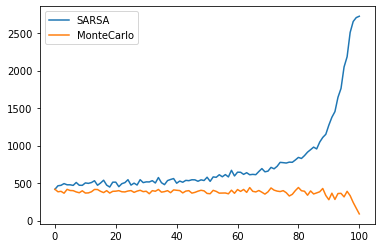

In [12]:
ax = data_s.evacuated.plot(label="SARSA")
data_mc.evacuated.plot(ax=ax,label="MonteCarlo")
ax.legend()